In [17]:
import pandas as pd
import numpy as np
import os
from mne.viz import circular_layout, plot_connectivity_circle
from matplotlib import colors as mcolors
from matplotlib import pyplot as plt

In [18]:
# DK cortical regions
regions = pd.read_csv('/data/sliu/imaging_genetics/DK_structure/Area_items.csv').iloc[:,-1].values.tolist()

In [19]:
#plot the improvements of replication probability with increasing sampling size
from matplotlib import pyplot as plt

def plot_figure(data,region,mytype,output_file):
    sampling_times = data.shape[0]
    ind = np.where(data >= 0.75)[0][0]
    y1 = data[ind]
    x1 = (ind + 1)*100
    fig = plt.figure(figsize=(16,8))
    x = np.arange(0,sampling_times*100,100) + 100
    
    plt.plot(x,data,'k',color='coral',linewidth=4)
    plt.scatter(x1, y1, marker='o', color='black',s=30)
#     plt.text(x1+300, y1-0.05, '('+str(x1)+','+str(y1)+')', fontsize=30)
    plt.hlines(y=y1,xmin=-500,xmax=x1,linestyles='dashed',linewidth=3,color ='gray')
    plt.vlines(x=x1,ymin=-0.05,ymax=y1,linestyles='dashed',linewidth=3,color ='gray')
    
    plt.ylabel('Replication probability',fontsize=30)
    if mytype == 'FC':
        FC_info = pd.read_csv('edge_list_d25.txt',sep=' ')
        tmp_x = FC_info.iloc[ind,1]
        tmp_y = FC_info.iloc[ind,2]
        plt.title(mytype+": "+str(tmp_x)+' - '+str(tmp_y),fontsize=30)
    else:
        plt.title(mytype+": "+region[4:],fontsize=30)
    plt.ylim(-0.05,1.1)
    plt.xlim(-500,sampling_times*100+100)
    plt.xlabel('sample size',fontsize=30)
    plt.tick_params(direction='out', length=10, width=4,labelsize=30)
#     plt.show()
    fig.savefig(output_file,dpi=300,bbox_inches = 'tight')
    return

In [24]:
#output the brain measures that can reach 75% replication probaility before sampling to half of the full sample
RP = 0.75 #75% replication probability
files = os.listdir('new_results/')
ts = ['0.05','0.01','fdr','bonferroni']
# ts = ['0.05']
for f in files:
    print(f)
    for t in ts:
        print(t)
        CT_reliability = pd.read_csv('new_results/'+f+'/CT_reliability_'+t+'.csv')
        CSA_reliability = pd.read_csv('new_results/'+f+'/CSA_reliability_'+t+'.csv')
        FC_reliability = pd.read_csv('new_results/'+f+'/FC_reliability_'+t+'.csv')
        CT_min_sizes = []
        CSA_min_sizes = []
        FC_min_sizes = []
        Num_regions = CT_reliability.shape[1]
        Num_FCs = FC_reliability.shape[1]
        sub_times = CT_reliability.shape[0]
        for i in range(Num_regions):
            CT_data = CT_reliability.iloc[:,i].values
            CT_max = np.max(CT_data)
            region = regions[i]
            if CT_max >= RP:
                CT_min_sizes.append(np.where(CT_data >= RP)[0][0] + 1)
#                 plot_figure(CT_data,region,'CT','new_results/'+f+'/figures/CT/'+t+'/'+region+'.png')
            else:
                CT_min_sizes.append(0)
            
           
            CSA_data = CSA_reliability.iloc[:,i].values
            CSA_max = np.max(CSA_data)
            if CSA_max >= RP:
                CSA_min_sizes.append(np.where(CSA_data >= RP)[0][0] + 1)
#                 plot_figure(CSA_data,region,'CSA','new_results/'+f+'/figures/CSA/'+t+'/'+region+'.png')
            else:
                CSA_min_sizes.append(0)

        for i in range(Num_FCs):
            FC_data = FC_reliability.iloc[:,i].values
            FC_max = np.max(FC_data)
            region = str(i+1)
            if FC_max >= RP:
                FC_min_sizes.append(np.where(FC_data >= RP)[0][0] + 1)
#                 plot_figure(FC_data,region,'FC','new_results/'+f+'/figures/FC/'+t+'/'+region+'.png')
            else:
                FC_min_sizes.append(0)
                
        odata1 = pd.DataFrame(data=CT_min_sizes)
        odata1['regions'] = regions
        odata1.to_csv('new_results/'+f+'/MIN_size_CT_'+t+'.csv',index=False)
        
        odata2 = pd.DataFrame(data=CSA_min_sizes)
        odata2['regions'] = regions
        odata2.to_csv('new_results/'+f+'/MIN_size_CSA_'+t+'.csv',index=False)
        
        odata3 = pd.DataFrame(data=FC_min_sizes)
        odata3['FCs'] = np.arange(210) + 1
        odata3.to_csv('new_results/'+f+'/MIN_size_FC_'+t+'.csv',index=False)

IQ
0.05
0.01
fdr
bonferroni
BMI
0.05
0.01
fdr
bonferroni
Age
0.05
0.01
fdr
bonferroni
Numeric_memory
0.05
0.01
fdr
bonferroni
Neuroticism
0.05
0.01
fdr
bonferroni
Birth
0.05
0.01
fdr
bonferroni
Alcohol
0.05
0.01
fdr
bonferroni


In [21]:
from nilearn import surface
from nilearn import datasets
from nilearn import plotting

lh_atlas = surface.load_surf_data('/data/sliu/Risky_behaviors_final/data/lh.aparc.annot')
rh_atlas = surface.load_surf_data('/data/sliu/Risky_behaviors_final/data/rh.aparc.annot')

fsaverage = datasets.fetch_surf_fsaverage(mesh='fsaverage5')

plotting_template = pd.read_csv('/data/sliu/Risky_behaviors_final/data/plotting_input.csv')

/data/sliu/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
def transfer_plotting_diff(data,plotting_template):
    trans_data = plotting_template.set_index('Structure')
    for i in range(data.shape[0]):
        region = data['regions'].iloc[i].split('-')
        if region[1] == 'lh':
            new_region = 'L_'+region[2]
        else:
            new_region = 'R_'+region[2]
 
        trans_data['d_icv'].loc[new_region] = data.iloc[i,0]
    return trans_data

In [77]:
def plot_brain_figure(data,lh_atlas,rh_atlas,output_path,tmax,sigt = None):
    s = lh_atlas.shape
    l_mask = np.zeros(s)
    for i in range(35):
        region_id = i + 1
        if region_id <= 3:
            l_mask[lh_atlas == region_id] = data[i]
        if region_id == 4:
            l_mask[lh_atlas == region_id] = 0
        if region_id > 4:
            l_mask[lh_atlas == region_id] = data[region_id - 2]

    r_mask = np.zeros(s)
    for i in range(35):
        region_id = i + 1
        if region_id <= 3:
            r_mask[rh_atlas == region_id] = data[i + 34]
        if region_id == 4:
            r_mask[rh_atlas == region_id] = 0
        if region_id > 4:
            r_mask[rh_atlas == region_id] = data[region_id - 2 + 34]
            
    
    plotting.plot_surf_stat_map(fsaverage['pial_left'], stat_map=l_mask,
                                hemi='left', view='lateral', cmap='coolwarm', colorbar=True,
                                bg_map=fsaverage['sulc_left'], bg_on_data=True,vmax=tmax,
                                darkness=.3,output_file=output_path + '_left_lateral.png')

    plotting.plot_surf_stat_map(fsaverage['pial_left'], stat_map=l_mask,
                                hemi='left', view='medial', cmap='coolwarm', colorbar=True,
                                bg_map=fsaverage['sulc_left'], bg_on_data=True,vmax=tmax,
                                darkness=.3,output_file=output_path + '_left_medial.png')


    plotting.plot_surf_stat_map(fsaverage['pial_right'], stat_map=r_mask,
                                hemi='right', view='medial', cmap='coolwarm', colorbar=True,
                                bg_map=fsaverage['sulc_right'], bg_on_data=True,vmax=tmax,
                                darkness=.3,output_file=output_path + '_right_medial.png')

    plotting.plot_surf_stat_map(fsaverage['pial_right'], stat_map=r_mask,
                                hemi='right', view='lateral', cmap='coolwarm', colorbar=True,
                                bg_map=fsaverage['sulc_right'], bg_on_data=True,vmax=tmax,
                                darkness=.3,output_file=output_path + '_right_lateral.png')
    
    if sigt != None:
        plotting.plot_surf_stat_map(fsaverage['pial_left'], stat_map=l_mask,
                                    hemi='left', view='lateral', cmap='coolwarm', colorbar=True,
                                    bg_map=fsaverage['sulc_left'], bg_on_data=True,vmax=tmax,threshold=sigt,
                                    darkness=.3,output_file=output_path + '_left_lateral_sig.png')

        plotting.plot_surf_stat_map(fsaverage['pial_left'], stat_map=l_mask,
                                    hemi='left', view='medial', cmap='coolwarm', colorbar=True,
                                    bg_map=fsaverage['sulc_left'], bg_on_data=True,vmax=tmax,threshold=sigt,
                                    darkness=.3,output_file=output_path + '_left_medial_sig.png')


        plotting.plot_surf_stat_map(fsaverage['pial_right'], stat_map=r_mask,
                                    hemi='right', view='medial', cmap='coolwarm', colorbar=True,
                                    bg_map=fsaverage['sulc_right'], bg_on_data=True,vmax=tmax,threshold=sigt,
                                    darkness=.3,output_file=output_path + '_right_medial_sig.png')

        plotting.plot_surf_stat_map(fsaverage['pial_right'], stat_map=r_mask,
                                    hemi='right', view='lateral', cmap='coolwarm', colorbar=True,
                                    bg_map=fsaverage['sulc_right'], bg_on_data=True,vmax=tmax,threshold=sigt,
                                    darkness=.3,output_file=output_path + '_right_lateral_sig.png')

In [10]:
def remove_png_files(file_dirs):
    files_in_directory = os.listdir(file_dirs)
    filtered_files = [file for file in files_in_directory if file.endswith(".png")]
    for file in filtered_files:
        path_to_file = os.path.join(file_dirs, file)
        os.remove(path_to_file)

In [82]:
# plot the brain images for CT and CSA

files = os.listdir('new_results/')
# t indictaes the significance thresholds: p<0.05, p<0.01, fdr_p<0.05, fdr_bonferroni<0.05
t = '0.05'
for f in files:
    print(f)
    remove_png_files('new_results/'+f+'/figures/CT/')
    remove_png_files('new_results/'+f+'/figures/CSA/')
    
    CT_reliability = pd.read_csv('new_results/'+f+'/CT_reliability_'+t+'.csv')
    CSA_reliability = pd.read_csv('new_results/'+f+'/CSA_reliability_'+t+'.csv')
    tmp_CT = CT_reliability.iloc[-1,:].values.tolist()
    Maxsize_CT = pd.DataFrame(data=tmp_CT)
    Maxsize_CT['regions'] = regions
    plotting_Maxsize_CT= transfer_plotting_diff(Maxsize_CT,plotting_template)
    Maxsize_CT2 = plotting_Maxsize_CT['d_icv'].values
    plot_brain_figure(Maxsize_CT2,lh_atlas,rh_atlas,'new_results/'+f+'/figures/CT/maxsize_'+t,1,0.75)
    
    tmp_CSA = CSA_reliability.iloc[-1,:].values.tolist()
    Maxsize_CSA = pd.DataFrame(data=tmp_CSA)
    Maxsize_CSA['regions'] = regions
    plotting_Maxsize_CSA= transfer_plotting_diff(Maxsize_CSA,plotting_template)
    Maxsize_CSA2 = plotting_Maxsize_CSA['d_icv'].values
    plot_brain_figure(Maxsize_CSA2,lh_atlas,rh_atlas,'new_results/'+f+'/figures/CSA/maxsize_'+t,1,0.75)
    
    max_subjs = CT_reliability.shape[0]
    print(max_subjs)
    Minsize_CT = pd.read_csv('new_results/'+f+'/MIN_size_CT_'+t+'.csv')
    tmp1 = 1- Minsize_CT.iloc[:,0].values/max_subjs
    tmp1[np.where(tmp1 == 1)] = -0.1
    tmax = np.max(tmp1)
    tmp1[tmp1 >= 0] = tmp1[tmp1 >= 0]/tmax + 1
    tmp1[tmp1 < 0] = 0

    Minsize_CT['0'] = tmp1
    plotting_Minsize_CT= transfer_plotting_diff(Minsize_CT,plotting_template)
    Minsize_CT2 = plotting_Minsize_CT['d_icv'].values
    
    plot_brain_figure(Minsize_CT2,lh_atlas,rh_atlas,'new_results/'+f+'/figures/CT/minsize_'+t,2,1)
    
    Minsize_CSA = pd.read_csv('new_results/'+f+'/MIN_size_CSA_'+t+'.csv')
    tmp2 = 1- Minsize_CSA.iloc[:,0].values/max_subjs
    tmp2[np.where(tmp2 == 1)] = -0.1
    tmax = np.max(tmp2)
    tmp2[tmp2 >= 0] = tmp2[tmp2 >= 0]/tmax + 1
    tmp2[tmp2 < 0] = 0
    Minsize_CSA['0'] = tmp2
    plotting_Minsize_CSA= transfer_plotting_diff(Minsize_CSA,plotting_template)
    Minsize_CSA2 = plotting_Minsize_CSA['d_icv'].values
    plot_brain_figure(Minsize_CSA2,lh_atlas,rh_atlas,'new_results/'+f+'/figures/CSA/minsize_'+t,2,1)

IQ
134
BMI
141
Age
147
Numeric_memory
88
Neuroticism
146
Birth
187
Alcohol
138


In [36]:
def plot_FC_circular_connection(data,output_path):
    
    label_names = []
    for i in range(21):
        label_names.append(i+1)
        
    
    FC_info = pd.read_csv('edge_list_d25.txt',sep=' ')
    node_order =[2,4,8,19,1,9,13,14,5,6,7,20,10,11,12,17,21,3,15,18,16]
    boundaries = [0,4,8,12,15,17]
    node_angles = circular_layout(label_names, node_order, start_pos=90, group_boundaries=boundaries)
    # cmaps = ['RdBu','Reds','Blues']
    
 
    FC_matrix = np.zeros((21,21))
    for j in range(210):
        if data[j] >= 1:
            x = FC_info.iloc[j,1] - 1
            y = FC_info.iloc[j,2] - 1
            FC_matrix[x,y] = data[j]
            FC_matrix[y,x] = data[j]

    fig = plt.figure(figsize=(10,10))    

    ax = plot_connectivity_circle(FC_matrix, label_names, vmin = 1, vmax = 2, facecolor = 'white', textcolor = 'black',
                        node_angles=node_angles, colormap='Reds', fig=fig, colorbar_size=0.5,
                        fontsize_colorbar=14,fontsize_names=14,linewidth=3)
    
    fig.savefig(output_path,dpi=300,bbox_inches = 'tight') 
    
    return

IQ
134


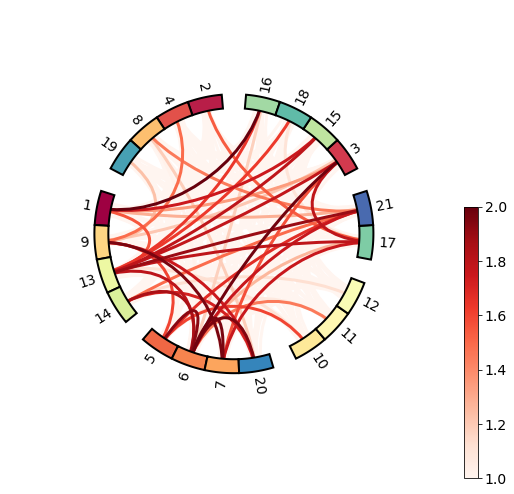

BMI
141


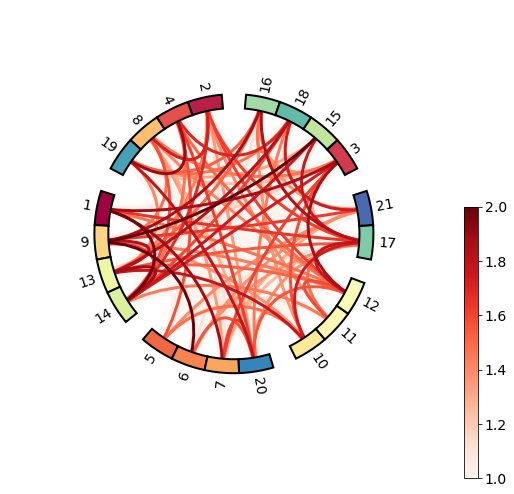

Age
147


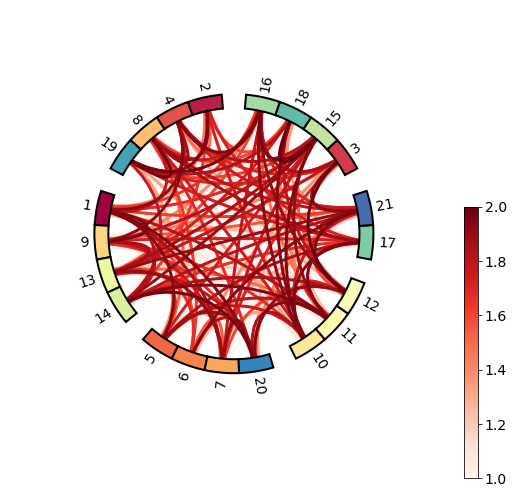

Numeric_memory
88


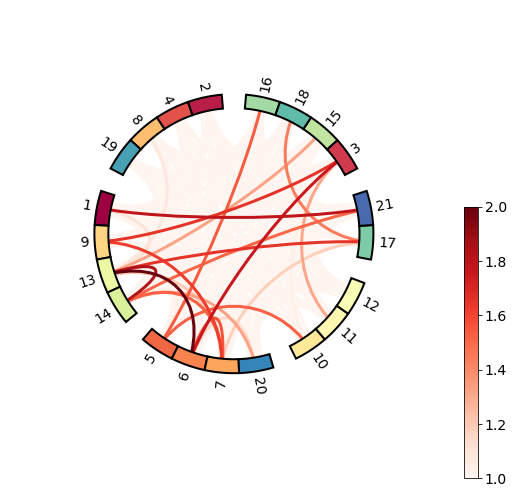

Neuroticism
146


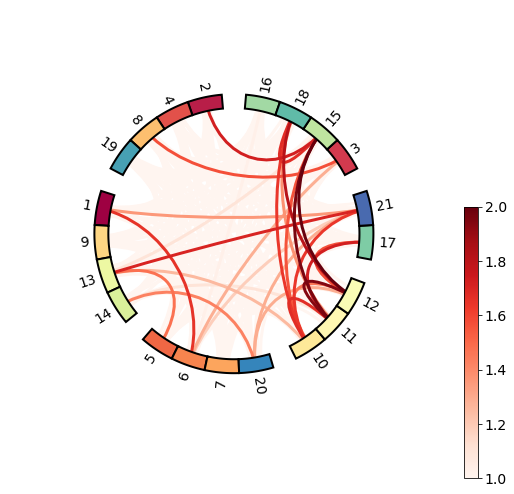

Birth
187


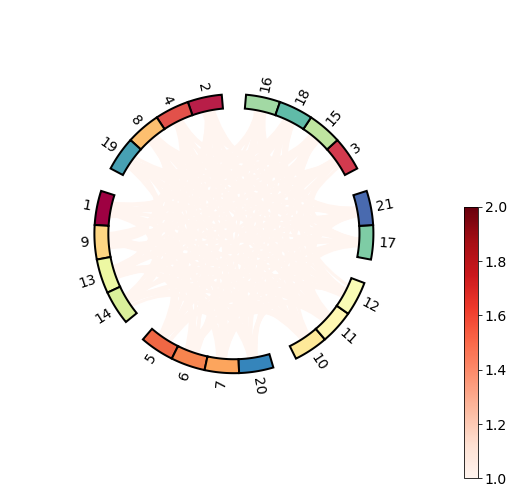

Alcohol
138


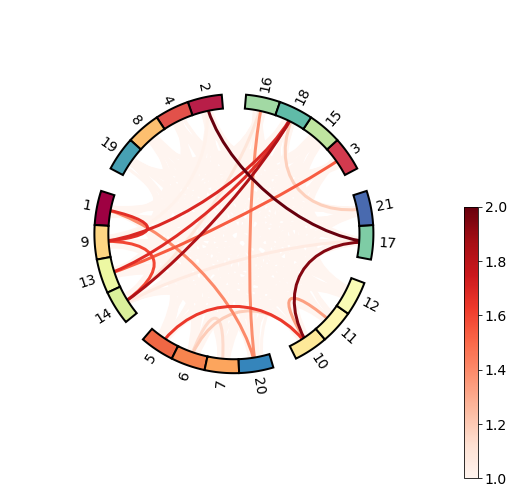

In [37]:
# plot the FC images
files = os.listdir('new_results/')
t = '0.05'
for f in files:
    print(f)
    remove_png_files('new_results/'+f+'/figures/FC/')
    FC_reliability = pd.read_csv('new_results/'+f+'/FC_reliability_'+t+'.csv')
    
    max_subjs = FC_reliability.shape[0]
    print(max_subjs)
    Minsize_FC = pd.read_csv('new_results/'+f+'/MIN_size_FC_'+t+'.csv')
    tmp1 = 1- Minsize_FC.iloc[:,0].values/max_subjs
    tmp1[np.where(tmp1 == 1)] = -0.1
    tmax = np.max(tmp1)
    tmp1[tmp1 >= 0] = tmp1[tmp1 >= 0]/tmax + 1
    tmp1[tmp1 < 0] = 0
    Minsize_FC['0'] = tmp1
    plot_FC_circular_connection(tmp1,'new_results/'+f+'/figures/FC/minsize_'+t+'.png')

In [52]:
# plot the minimally required sample size for 75% replication probability
def plot_tmp_figure(data,title,output_file):
    sampling_times = data.shape[0]
    ind = np.where(data >= 0.75)[0][0]
    y1 = data[ind]
    x1 = (ind + 1)*100
    fig = plt.figure(figsize=(16,8))
    x = np.arange(0,sampling_times*100,100) + 100
    
    plt.plot(x,data,'k',color='coral',linewidth=4)
    plt.scatter(x1, y1, marker='o', color='black',s=30)
    if sampling_times - ind < 20:
        plt.text(x1-1500, y1+0.05, '('+str(x1)+','+str(y1)+')', fontsize=30)
    else:
        plt.text(x1+300, y1-0.05, '('+str(x1)+','+str(y1)+')', fontsize=30)
        
    plt.hlines(y=y1,xmin=-500,xmax=x1,linestyles='dashed',linewidth=3,color ='gray')
    plt.vlines(x=x1,ymin=-0.05,ymax=y1,linestyles='dashed',linewidth=3,color ='gray')
    
    plt.ylabel('replication probability',fontsize=30)  
    plt.title(title,fontsize=30)

    plt.ylim(-0.05,1.1)
    plt.xlim(-500,sampling_times*100+100)
    plt.xlabel('sample size',fontsize=30)
    ax = plt.gca()
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    plt.tick_params(direction='out', length=10, width=4,labelsize=30)
#     plt.show()
    fig.savefig(output_file,dpi=300,bbox_inches = 'tight')
    return

IQ 13400 11700 0.75 ctx-lh-precentral
BMI 14000 1600 0.75 ctx-rh-superiorparietal
Age 14600 300 0.75 ctx-lh-transversetemporal
Numeric_memory 8400 8400 0.79 ctx-rh-superiorparietal
Neuroticism 13800 13000 0.76 ctx-lh-parahippocampal
Alcohol 13400 6800 0.75 ctx-lh-lateraloccipital


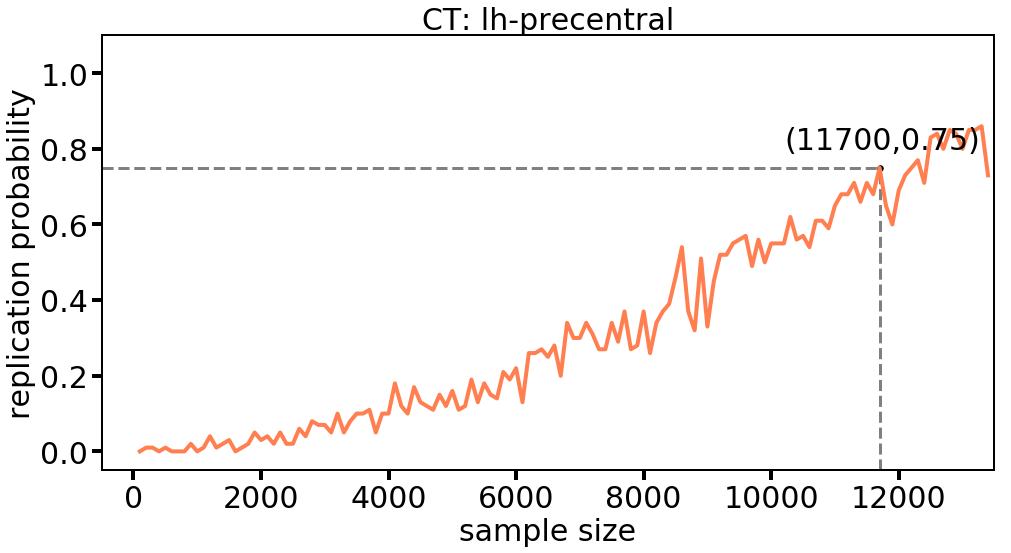

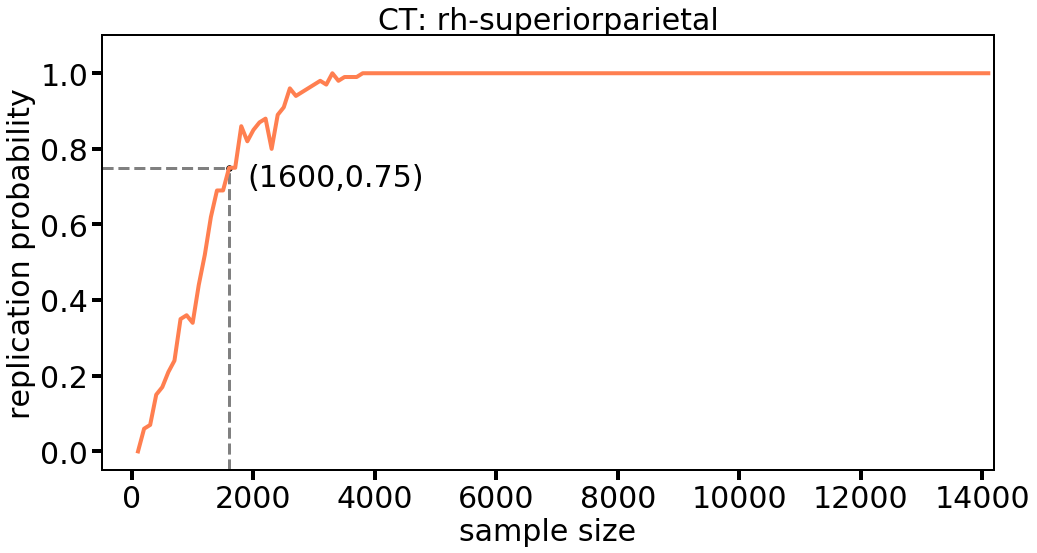

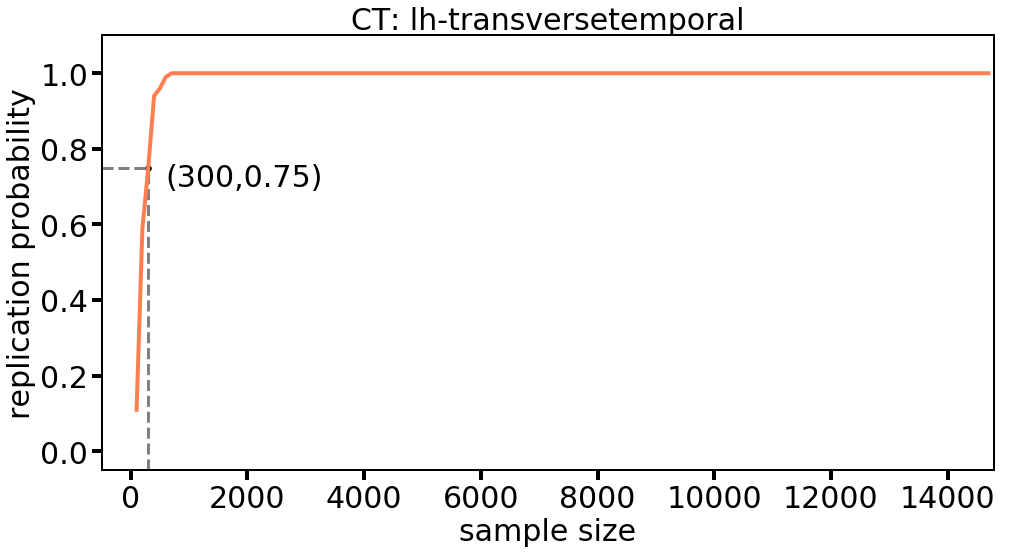

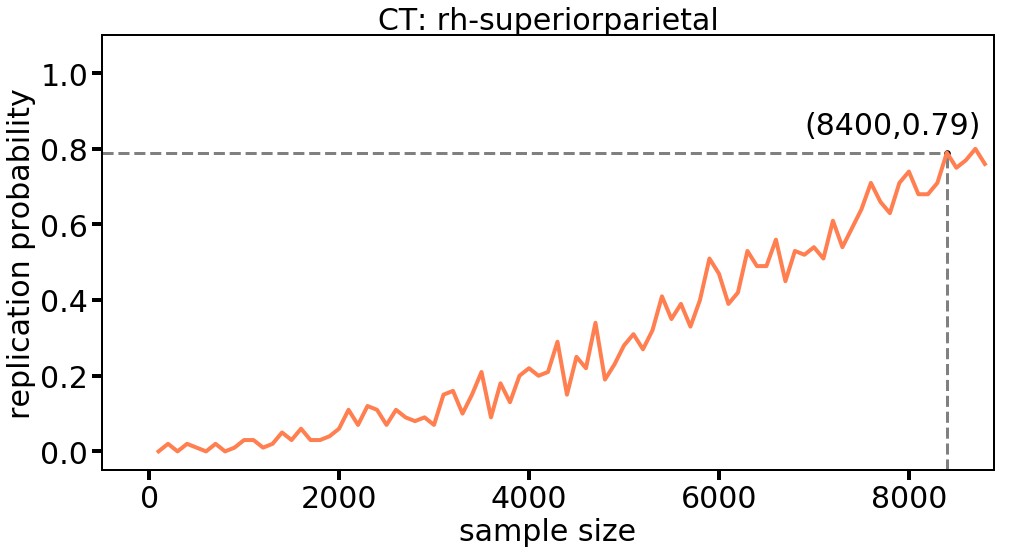

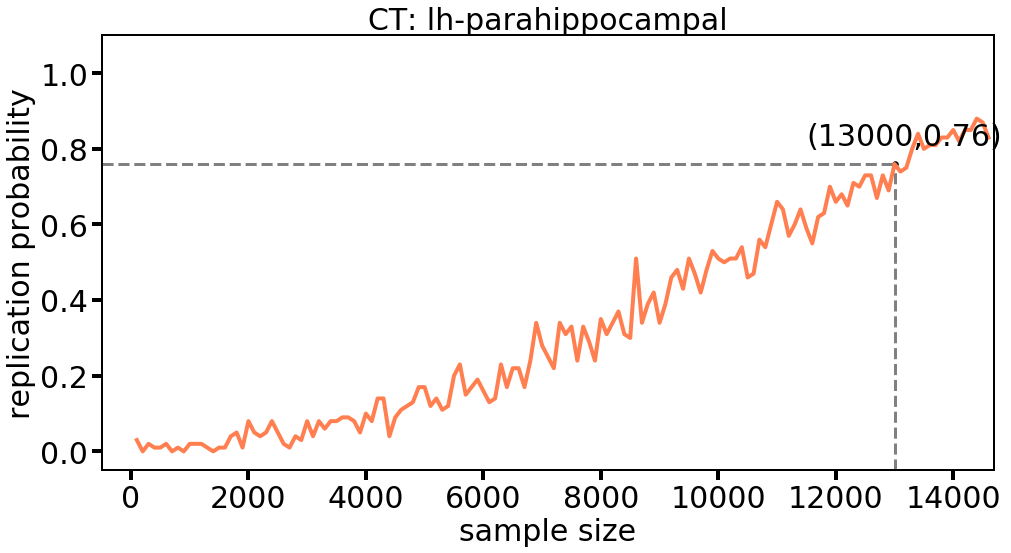

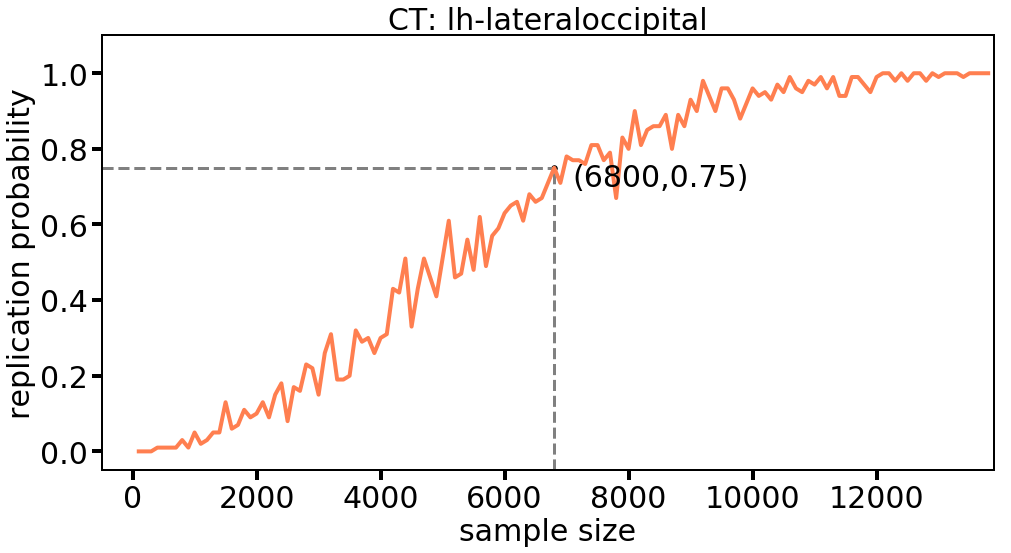

In [55]:
files = os.listdir('new_results/')
FC_info = pd.read_csv('edge_list_d25.txt',sep=' ')
mytype='CT'
t = '0.05'
for f in files:
    if f == 'Birth':
        continue
    data_reliability = pd.read_csv('new_results/'+f+'/MIN_size_'+mytype+'_'+t+'.csv')
    tmp = data_reliability.iloc[:,0].values
    data_reliability2 = pd.read_csv('new_results/'+f+'/MIN_size_'+mytype+'_'+t+'.csv')
    tmp1 = data_reliability2.iloc[:,0].values
    if np.sum(tmp1) == 0:
        print(f,'does not exit')
        continue
    tmp1[tmp1==0] = 1000
    min_pos = np.argmin(tmp1)
    data_reliability3 = pd.read_csv('new_results/'+f+'/'+mytype+'_reliability_'+t+'.csv')
    min_values = data_reliability3.iloc[:,min_pos].values
    real_values = data_reliability3.iloc[np.min(tmp1)-1,min_pos]
    if mytype == 'FC':
        my_title = mytype + ': ' + str(FC_info.iloc[min_pos,1])+ ' - ' + str(FC_info.iloc[min_pos,2])
        print(f,np.max(tmp)*100,np.min(tmp1)*100,real_values,min_pos+1)
    else:
        region = regions[min_pos]
        my_title = mytype + ': ' + region[4:]
        print(f,np.max(tmp)*100,np.min(tmp1)*100,real_values,region)
        
    plot_tmp_figure(min_values,my_title,'new_results/'+f+'/figures/'+mytype+'/best_minsize_'+t+'.png')
    